# Loading data into Mongo

This notebook is used to carefully select the data we want to write to mongo
since our server isn't large. all of the data will still be in s3 for mapreduce style work loads.

Mongo is mainly here for labeling purposes

In [1]:
from itpy import Itpy
from json import loads
from pymongo import MongoClient
from config import db

%matplotlib inline

import matplotlib.pyplot as plt

import os
import pandas as pd

# Load Predictions

In [2]:
from itpy.helpers import try_or

path = "/Users/JasonLiu/Downloads/drinking/csv/"
df = pd.concat([pd.DataFrame.from_csv(path+f) for f in os.listdir(path)])
df._id = df._id.apply(str).apply(eval).apply(try_or(lambda _:_["$oid"], None))
df = df.set_index("_id")

In [3]:
upper = 1
lower = 0
sample = 0.05

In [4]:
dd = df[(df.predict > lower) & (df.predict < upper)]

In [5]:
ids = set(dd[dd.random_number < sample].index)

In [6]:
len(ids)

26553

# Prepare JSON

In [7]:
def clean(obj):
    """
    removes the keys with $ and adds the predict key
    """
    obj["_id"] = obj["_id"]["$oid"]
    del obj["timestamp"]
    return obj


def data_iter():
    with open("/Users/JasonLiu/Downloads/drinking-dump.json") as f:
        for line in f:
            obj = clean(loads(line))
            if obj["_id"] in ids:
                obj["predict"] = df.loc[obj["_id"]].predict
                yield obj
            

def partition(itera, n):
    i = 0
    l = []
    for element in itera:
        if element["_id"] in ids:
            l.append(element)
            i += 1
        if i > n:
            yield l
            l = []
            i = 0
        yield la

# Reading Mongo

In [12]:
collection = db

In [13]:
mongodb = pd.DataFrame(Itpy(collection.find(projection={"predict":1}))._)

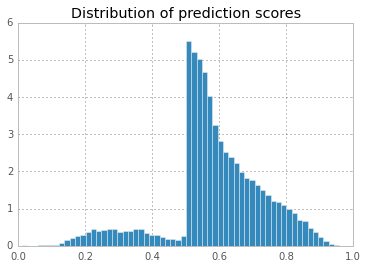

In [14]:
plt.hist(mongodb.predict, bins=60, normed=True)
plt.title("Distribution of prediction scores")
plt.show()

# Writing Labels

In [15]:
df = pd.DataFrame.from_csv("./twitter_labels.csv")

In [23]:
for k,v in df._alcohol.to_dict().items():
    db.find_one_and_update({"_id":k}, {"$set": {"labels": {"alcohol":int(v)}}})

In [3]:
db.find_one({"labels":{"$exists":True}}, projection={"text":1, "labels":1})

{'_id': '556e0ee3d6dfbb462880f0a5',
 'labels': {'alcohol': 0},
 'text': 'Impatiently waiting to get our hands on the new @UrbanDecay Naked Smoky Palette. #CrueltyFree #VivaBeauty'}